In [124]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

# https://www.kaggle.com/jyzaguirre/us-homicide-reports/version/2
homicides_df = load_csv('U.S._Homicide_Reports,_1980-2014_Homicides_between_1980_and_2014')

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_FOLDER	 ENCODING_TYPE	 FrozenList	 SAVES_FOLDER	 african_homicide_rates	 africans_AxesSubplot	 asian_pop_df	 asians_max_year_df	 asians_max_year_groupby	 
attempt_to_pickle	 ax	 black_himicide_rates	 black_homicide_rates	 black_pop_df	 blacks_AxesSubplot	 blacks_max_year_df	 blacks_max_year_groupby	 column_list	 
column_name	 country_pop_df	 country_str	 dtype_df	 european_homicide_rates	 europeans_AxesSubplot	 example_iterrows	 f	 fig	 
format_str	 get_column_descriptions	 global_african_data	 global_european_data	 homicides_df	 homicides_max_year_df	 homicides_max_year_groupby	 hypothesis_format_str	 load_csv	 
load_dataframes	 load_object	 match_series	 math	 max_year	 np	 os	 pd	 percents_df	 
pickle	 plt	 pop_df	 pop_dict	 pop_max_year_series	 save_dataframes	 store_objects	 tables_df_list	 tables_url	 
test_populations	 test_race	 ttest_ind	 us_black_data	 us_pop_df	 us_white_data	 white_homici

In [125]:

homicides_df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [126]:

len(homicides_df['State'].unique())

51

In [127]:

wiki_url = 'https://en.wikipedia.org/wiki/'
us_pop_df = pd.DataFrame([])
year_set = set([1980, 1990, 2000])
for year in year_set:
    try:
        tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
        tables_df_list = pd.read_html(tables_url)

        pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
        pop_df.columns = pop_df.iloc[0]
        pop_df = pop_df.iloc[1:].T
        pop_df.columns = pop_df.iloc[1]
        pop_df = pop_df.iloc[range(0, 3, 2)].T
        
        pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
        us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                             left_index=True, right_index=True)
    except Exception as e:
        print(e)
us_pop_df = us_pop_df.dropna()

In [128]:

dtype_df = get_column_descriptions(us_pop_df)
match_series = (dtype_df['only_integers'] == True)

In [129]:

for column_name in dtype_df[match_series]['column_name']:
    us_pop_df[column_name] = us_pop_df[column_name].map(lambda x: int(x))

In [130]:

year_set = set([1980, 1990, 2000])
max_year = max(set(homicides_df['Year'].unique()) & year_set)

In [131]:

homicides_df['Crime Type'].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

In [132]:

column_list = ['State', 'Year', 'Perpetrator Race']
homicides_df[column_list].sample(5).T.tail(15).T

,State,Year,Perpetrator Race
195598,Texas,1989,Unknown
343879,Massachusetts,1996,Black
99387,Tennessee,1984,Black
242077,Wisconsin,1991,White
583122,Florida,2011,White


In [133]:

homicides_df.sample(5).T

,396167,619187,75068,538375,409395
Record ID,396168,619188,75069,538376,409396
Agency Code,NC03201,NY03030,MOKPD00,GA06702,MI09239
Agency Name,Durham,New York,Kansas City,Gwinnett County,Bay City
Agency Type,Municipal Police,Municipal Police,Municipal Police,County Police,Municipal Police
City,Durham,New York,Jackson,Gwinnett,Bay
State,North Carolina,New York,Missouri,Georgia,Michigan
Year,1999,2012,1983,2008,2000
Month,June,May,February,May,September
Incident,1,31,8,1,1
Crime Type,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter


In [134]:

from pandas.core.indexes.frozen import FrozenList

column_list = ['State', 'Perpetrator Race']
match_series = (homicides_df['Year'] == max_year)
homicides_max_year_groupby = homicides_df[match_series].groupby(by=column_list)
homicides_max_year_df = homicides_max_year_groupby['Perpetrator Count'].sum()
homicides_max_year_df.index.names = FrozenList(['State', 'Race'])
homicides_max_year_df.index.names

FrozenList(['State', 'Race'])

In [135]:

homicides_max_year_df = homicides_max_year_df.reset_index()

In [136]:

def f(x):
    
    return float(x[:-1])/100

In [137]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}Historical_racial_and_ethnic_demographics_of_the_United_States'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [138]:

# African–Americans as percentage of total population (1790–2010) by U.S. state
black_pop_df = tables_df_list[27]
black_pop_df.columns = black_pop_df.iloc[0]
black_pop_df = black_pop_df.iloc[1:].T
black_pop_df.columns = black_pop_df.iloc[0]
black_pop_df = black_pop_df.iloc[1:].T
black_pop_df.columns = [int(column_name) for column_name in black_pop_df.columns]
blacks_max_year_df = black_pop_df[max_year].reset_index()
blacks_max_year_df.columns = ['State', 'Percent']
blacks_max_year_df['Race'] = 'Black'
column_list = ['State', 'Race']
blacks_max_year_groupby = blacks_max_year_df.groupby(by=column_list)
blacks_max_year_df = blacks_max_year_groupby['Percent'].max().map(f).reset_index()

In [139]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}White_Americans'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [140]:

# White American population as of 2000 and 2010 censuses
white_pop_df = tables_df_list[2]
white_pop_df.columns = white_pop_df.iloc[0]
white_pop_df = white_pop_df.iloc[1:].T
white_pop_df.columns = white_pop_df.iloc[0]
white_pop_df = white_pop_df.iloc[1:].T
white_pop_df.columns = ['Population_2000', 'Percent_2000', 'Population_2010',
                        'Percent_2010', 'Percent_Growth']
whites_max_year_df = white_pop_df['Percent_{}'.format(max_year)].reset_index()
whites_max_year_df.columns = ['State', 'Percent']
whites_max_year_df['Race'] = 'White'
column_list = ['State', 'Race']
whites_max_year_groupby = whites_max_year_df.groupby(by=column_list)
whites_max_year_df = whites_max_year_groupby['Percent'].max().map(f).reset_index()

In [141]:

column_list = ['State', 'Race', 'Percent']
percents_df = pd.merge(left=whites_max_year_df, right=blacks_max_year_df, how='outer',
                       on=column_list).sort_values(column_list).reset_index(drop=True)
column_list = ['State', 'Race']
homicides_max_year_df = pd.merge(left=homicides_max_year_df, right=percents_df, how='outer',
                                 on=column_list).sort_values(column_list).reset_index(drop=True)


We are looking to compute the intentional homicide rate per 100,000 inhabitants for our max year.

In [145]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}List_of_countries_by_intentional_homicide_rate'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)
len(tables_df_list)

11

In [146]:

# UNODC murder rates: murders per 100,000 inhabitants
country_pop_df = tables_df_list[3]
country_pop_df.columns = country_pop_df.iloc[0]
country_pop_df = country_pop_df.iloc[2:].T
country_pop_df.columns = country_pop_df.iloc[0]
country_pop_df = country_pop_df.iloc[1:].T
country_pop_df.index.name = 'Country'
country_pop_df.columns = ['Region', 'Subregion', 'Rate', 'Count', 'Year', 'Source']
country_pop_df['Rate'] = country_pop_df['Rate'].map(lambda x: float(x))

In [147]:

match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
african_homicide_rates = country_pop_df[match_series]['Rate'].dropna().tolist()

In [148]:

match_series = (country_pop_df['Region'] == 'Europe')
european_homicide_rates = country_pop_df[match_series]['Rate'].dropna().tolist()

In [168]:

import numpy as np

pop_dict = us_pop_df['Population_{}'.format(max_year)].to_dict()

def f(row_series):
    state = row_series['State']
    count = row_series['Perpetrator Count']
    percent = row_series['Percent']
    if state in pop_dict:
        population = pop_dict[state]
        rate = 100000*count/(population*percent)
    else:
        rate = np.nan
    
    return rate

homicides_max_year_df['Rate'] = homicides_max_year_df.apply(f, axis=1)

In [169]:

match_series = (homicides_max_year_df['Race'] == 'Black')
black_homicide_rates = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [170]:

match_series = (homicides_max_year_df['Race'] == 'White')
white_homicide_rates = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [171]:

from scipy.stats import ttest_ind

format_str = 'Here are the country groups tested against the murder rate data you agreed to:'
print(format_str)
print()

hypothesis_format_str = 'We {} reject the null hypothesis that the {} '
hypothesis_format_str += 'population did not come from the same distribution as the {} population.'

def test_populations(global_data, us_data, country_str, test_race):
    t, p = ttest_ind(a=global_data, b=us_data, axis=0, equal_var=True, nan_policy='raise')
    print('{} vs {}: t={:0.2f}; p={:0.3f}'.format(country_str, test_race, t[0], p[0]))

    # If that probability is small we can reject the null hypothesis
    if p[0] < 0.05:
        can_cannot = 'can'
    else:
        can_cannot = 'cannot'
    print(hypothesis_format_str.format(can_cannot, test_race, country_str))
    print()

test_race = 'US White'
us_white_data = np.array(white_homicide_rates).reshape((-1, 1))
global_european_data = np.array(european_homicide_rates).reshape((-1, 1))
global_african_data = np.array(african_homicide_rates).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_white_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_white_data, country_str, test_race)

test_race = 'US Black'
us_black_data = np.array(black_homicide_rates).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_black_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_black_data, country_str, test_race)

Here are the country groups tested against the murder rate data you agreed to:

European countries vs US White: t=3.82; p=0.000
We can reject the null hypothesis that the US White population did not come from the same distribution as the European countries population.

African countries vs US White: t=7.61; p=0.000
We can reject the null hypothesis that the US White population did not come from the same distribution as the African countries population.

European countries vs US Black: t=-5.03; p=0.000
We can reject the null hypothesis that the US Black population did not come from the same distribution as the European countries population.

African countries vs US Black: t=2.85; p=0.005
We can reject the null hypothesis that the US Black population did not come from the same distribution as the African countries population.



In [159]:

import matplotlib.pyplot as plt
%matplotlib inline

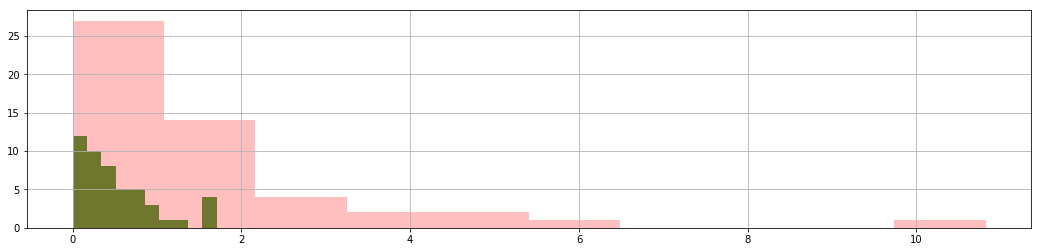

In [172]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
whites_AxesSubplot = pd.Series(white_homicide_rates).hist(ax=ax, bins=10, alpha=0.75, color='green')
europeans_AxesSubplot = pd.Series(european_homicide_rates).hist(ax=ax, bins=10, alpha=0.25,
                                                                color='red')

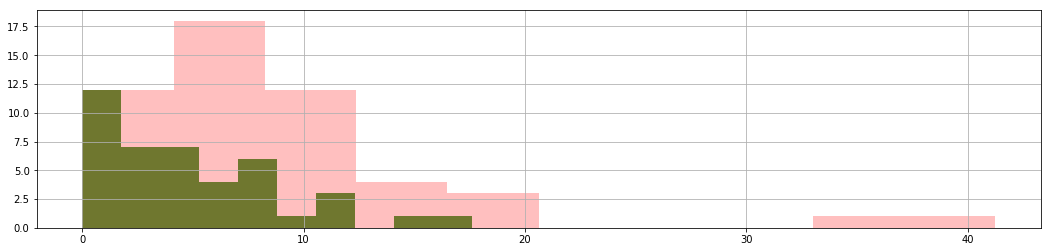

In [173]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
blacks_AxesSubplot = pd.Series(black_homicide_rates).hist(ax=ax, bins=10, alpha=0.75, color='green')
africans_AxesSubplot = pd.Series(african_homicide_rates).hist(ax=ax, bins=10, alpha=0.25,
                                                                color='red')

In [1]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))